<hr>
Este material ha sido construido en conjunto con material suministrado por los profesores Pedro Atencio (Instituto Tecnológico Metropolitano), Carlos Mera (Universidad de Medellin), Albeiro Espinosa y Diego Patiño (Universidad Nacional de Colombia, Sede Medellín); a ellos les damos crédito.
<hr>

#  <center> VISIÓN ARTIFICIAL </center>
## Agenda del día


### Unidad 9 - Morfología


<ul>
  <li>Introducción</li>
  <li>Imágenes binarias</li>
  <li>Imágenes en escala de grises</li>


</ul>


<!-- <ul>
<li><b>6.1. Introduccion</b></li>
    <ul>
        <li>Operaciones de conjuntos.</li>
        <li>Elemento estructural.</li>
    </ul>
<li><b>6.2. Caso: Imágenes binarias</b></li>
    <ul>
        <li>6.2.1. Basicas: Dilatación, erosión, apertura y cierre.</li>
        <li>6.2.2. Otras operaciones.</li>
    </ul>
<li><b>6.3. Caso: Imágenes en escala de grises</b></li>
    <ul>
        <li>Dilatación, erosión, apertura y cierre.</li>
        <li>Top-Hat(white, black).</li>
    </ul>
</ul>
<hr>-->

In [1]:
#Importar librerías
#http://scikit-image.org/docs/dev/api/skimage.morphology.html
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.morphology as morph
import skimage
import skimage.io
import skimage.color as color

# Mostrar imagen
def show_image(img):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(img, cmap='gray')
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()


<img src="res/intro.png\" alt="" style="width:620px">

# 1. Introducción
Las operaciones morfológicas son operaciones que afectan la forma de los objetos en la imagen. Este tipo de operaciones están definidas principalmente para imágenes binarias aunque pueden ser utilizadas también con imágenes en escala de grises.

Las operaciones morfológicas se usan para:
- Simplificar las imágenes mientras se conservan las principales características de forma de los objetos.

- Destacar la estructura de los objetos (extraer el esqueleto, obtener bordes, etc.)

<br>

<center><i>Figura. Ejemplo de operación morfológica.</i>

<img src="res/M6/intro.png" alt="" style="width:620px"></center>


Las operaciones morfológicas se basan en la teoría de conjuntos. Sean A y B dos conjuntos, se tiene que:

- **Intersección:** $A \cap B = \left\{ x \mid x \in A \wedge x \in B \right\} $
- **Unión:** $A \cup B = \left\{ x \mid x \in A \lor x \in B \right\} $
- **Complemento**: $A^c = \left\{x \mid x \notin A \right\}$
- **Diferencia**: $A-B = \left\{x \mid x \in A \wedge x \notin B \right\} = A \cap B^c$
- **Reflexión**: $\hat{A} = \left\{ x \mid x=-a, \forall \space a \in  A \right\}$
- **Traslación**: $(A)_z = \left\{ a + z,\forall {\space} a \in A\right\}$

<center><i>Figura. Ejemplos de las operaciones anteriores.</i>

<img src="res/M6/ejemplos.png" alt="" style="width:700px"></center>
<hr>

## Elemento estructural / estructurante

- Las operaciones morfológicas, generalmente, utilizan un “conjunto” o “imagen” denominado elemento estructural o estructurante.

- Cuando se usa la teoría de conjuntos en las operaciones morfológicas, se considera al conjunto A la imagen original y al conjunto B el elemento Estructurante. 

- El elemento estructurante es a la morfología matemática lo que la máscara de convolución es a los filtros lineales.

- Ejemplos de elementos estructurantes son:

<center><i>Figura. Elemento estructurante.</i>

<img src="res/M6/elemento_estructural.png" alt="" style="width:600px"></center>

- Los elementos estructurales tienen un origen o centro. La ubicación de dicho centro altera el resultado de la operación morfológica.

<center><i>Figura. Elemento estructural y origen.</i>

<img src="res/M6/origen.png" alt="" style="width:600px"></center>

- Al crear elementos estructurales mediante la librería scikit-image (skimage), el origen de los mismos es siempre el centro.
<hr>

[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]] 

 uint8


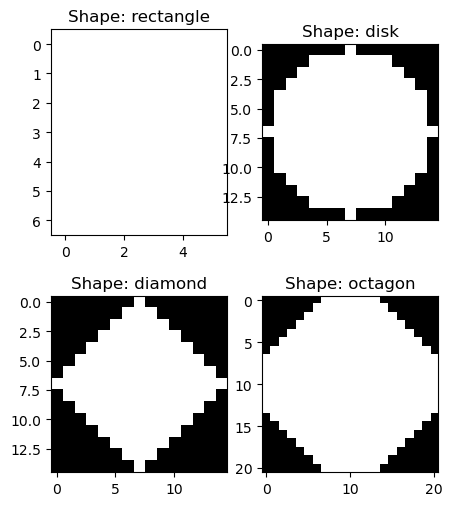

In [2]:
"""Crear usando la librería morph de skimage, diferentes figuras como rectángulos, diamantes
octágonos y discos, nótese que se define el tamaño de la figura como parámetro en píxeles
o el radio de la misma."""
elem1 = morph.rectangle(7,6)
elem2 = morph.disk(7)
elem3 = morph.diamond(7)
elem4 = morph.octagon(7,7)

#Crear un subplot 2x2 que muestre las figuras creadas
fig, ax = plt.subplots(2,2, figsize=(5, 6))
ax[0,0].set_title('Shape: rectangle')
ax[0,0].imshow(elem1, cmap='gray', vmin=0, vmax=1)
ax[0,1].set_title('Shape: disk')
ax[0,1].imshow(elem2, cmap='gray')
ax[1,0].set_title('Shape: diamond')
ax[1,0].imshow(elem3, cmap='gray')
ax[1,1].set_title('Shape: octagon')
ax[1,1].imshow(elem4, cmap='gray');

#Imprimir la matriz y tipo correspondiente al rectángulo
print(elem1,'\n\n',elem1.dtype)

In [3]:
elem1.shape

(7, 6)

# 2. Imágenes Binarias
El primer caso de aplicación de las operaciones morfológicas es para imágenes binarias. A continuación algunas de las operaciones principales.
<hr>

## 2.1 Dilatación
La dilatación permite agregar pixeles a un objeto para hacerlo más grande, es decir, amplía las regiones claras y reduce las oscuras. Todas las operaciones morfológicas actúan sobre el vecindario del píxel objetivo.

<center><i>Figura. Dilatación.</i>

<img src="res/M6/dilatacion.png" alt="" style="width:620px"></center>

<center><i>Figura. Ejemplos.</i>

<img src="res/M6/ejemplo_dilatacion.png" alt="" style="width:620px"></center>
<hr>

$$A \oplus B = \left\{ z \mid \hat{(B)}_z \cap A \neq \phi \right\} = \left\{ a + b \mid a \in A \wedge b \in B \right\}$$

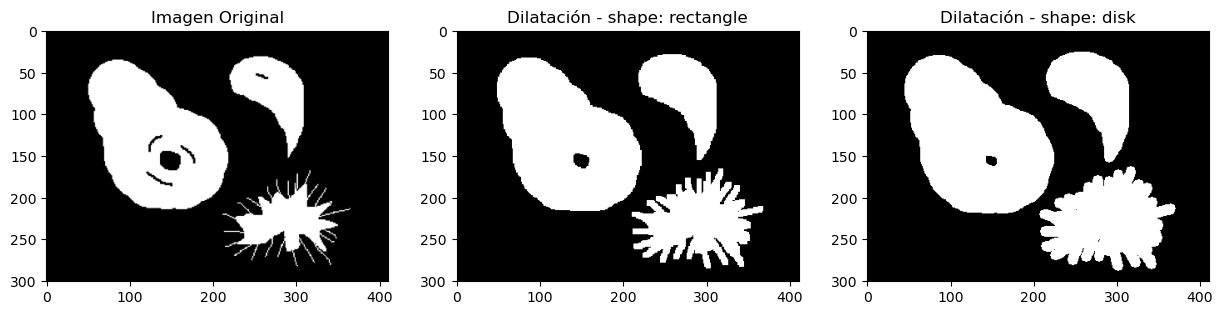

In [4]:
#Crear un rectángulo y un diso
elem1 = morph.rectangle(5,5)
elem2 = morph.disk(5)

#Leer la imagen de entrada
img = skimage.io.imread('./res/M6/imagen_ejemplo1.png', as_gray=True)

#Utilizar la función de dilatación binaria de skimage sobre la imagen de entrada, añadiendo píxeles con distintas máscaras
dilatacion1 = morph.binary_dilation(img,elem1)
dilatacion2 = morph.binary_dilation(img,elem2)

#Crear subplot 1x3 que muestre imagen original e imágenes dilatadas
fig, ax = plt.subplots(1,3, figsize=(15, 8))
ax[0].set_title('Imagen Original')
ax[0].imshow(img, cmap='gray')
ax[1].set_title('Dilatación - shape: rectangle')
ax[1].imshow(dilatacion1, cmap='gray')
ax[2].set_title('Dilatación - shape: disk')
ax[2].imshow(dilatacion2, cmap='gray');

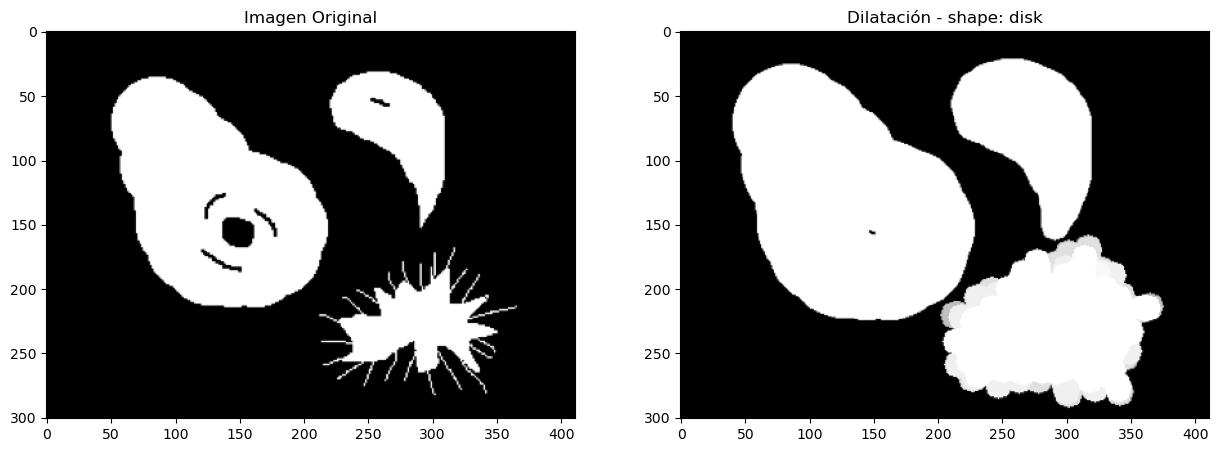

In [5]:
# Leer la imagen de entrada en escala de grises
img = cv2.imread('./res/M6/imagen_ejemplo1.png', 0)

# Crear un disco de radio 5
kernel = morph.disk(5)

# Utilizar la función de dilatación binaria de Opencv sobre la imagen de entrada con dos iteraciones
dilatacion = cv2.morphologyEx(img, cv2.MORPH_DILATE, kernel, iterations = 2)

#Crear subplot 1x2 que muestre imagen original e imagen dilatada
fig, ax = plt.subplots(1,2, figsize=(15, 8))
ax[0].set_title('Imagen Original')
ax[0].imshow(img, cmap='gray')
ax[1].set_title('Dilatación - shape: disk')
ax[1].imshow(dilatacion, cmap='gray');

**La dilatación es acumulativa, es decir, si sobre la imagen resultante se vuelve a realizar la dilatación, el area de la zona clara aumenta de nuevo.**

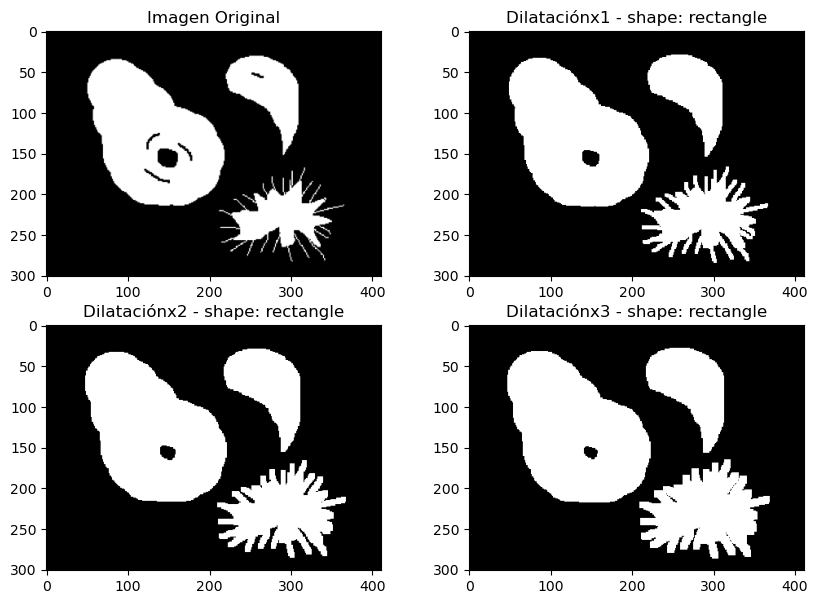

In [6]:
#Crear las máscaras
elem1 = morph.rectangle(3,3)
elem2 = morph.disk(3)

#Leer imagen de entrada
img = skimage.io.imread('./res/M6/imagen_ejemplo1.png', as_gray=True)

#Realizar dilataciones acumulativas sobre img
dilatacionx1 = morph.binary_dilation(img,elem1)
dilatacionx2 = morph.binary_dilation(dilatacionx1,elem1)
dilatacionx3 = morph.binary_dilation(dilatacionx2,elem1)

#Crear subplot 2x2 para mostrar imagen original y sus dilataciones
fig, ax = plt.subplots(2,2, figsize=(10, 7))
ax[0,0].set_title('Imagen Original')
ax[0,0].imshow(img, cmap='gray')
ax[0,1].set_title('Dilataciónx1 - shape: rectangle')
ax[0,1].imshow(dilatacionx1, cmap='gray')
ax[1,0].set_title('Dilataciónx2 - shape: rectangle')
ax[1,0].imshow(dilatacionx2, cmap='gray')
ax[1,1].set_title('Dilataciónx3 - shape: rectangle')
ax[1,1].imshow(dilatacionx3, cmap='gray');

<hr>
<center><i>Figura. Dilatación y procesamiento de textos.</i>

<img src="res/M6/ejemplo_dilatacion2.png" alt="" style="width:700px"></center>
<hr>

**La dilatación tambien puede ser utilizada para la detección de bordes, substrayendo la imagen original de la ditalada. Por ejemplo:**

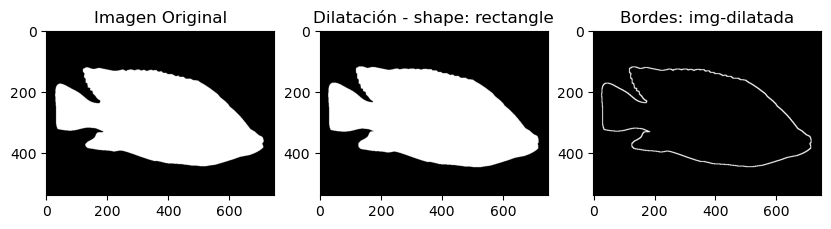

In [7]:
#Crear máscaras
selem = morph.rectangle(7,7)

#Leer imagen de entrada y binarizarla
img = skimage.io.imread('./res/segm/1.tif', as_gray=True)
img = img > 0 #forma binarizar la imagen de entrada

#Aplicar una dilatación con la máscara de diamante
dilatacion = morph.binary_dilation(img,selem)

#Crear subplot 1x3 que muestre figura original, dilatada y con bordes extraídos
fig, ax = plt.subplots(1,3, figsize=(10, 7))
ax[0].set_title('Imagen Original')
ax[0].imshow(img, cmap='gray')
ax[1].set_title('Dilatación - shape: rectangle')
ax[1].imshow(dilatacion, cmap='gray')
ax[2].set_title('Bordes: img-dilatada')
ax[2].imshow(np.bitwise_xor(img, dilatacion), cmap='gray');

## 2.2 Erosión
El principal efecto del operador morfológico erosión, sobre una imagen binaria es encoger o erosionar los bordes de las regiones claras, haciendo de esta forma que los huecos y cavidades en la imagen binaria se agranden.

Para computar la erosión de una imagen binaria con un elemento estructural, situamos el origen del mismo en cada elemento de la imagen.  Entonces, si para cada pixel del elemento estructural, el correspondiente pixel en la imagen es 1, el píxel actual se mantiene; en caso contrario se omite de la imagen resultante.

<center><i>Figura. Erosión de la imagen (izq) mediante un elemento estructural rectangular de 3 x 3.</i>

<img src="res/M6/erosion.png" alt="" style="width:620px"></center>

<center><i>Figura. Ejemplos de erosión con distintos elementos estructurales.</i>

<img src="res/M6/ejemplo_erosion1.png" alt="" style="height:300px"></center>

$$A \ominus B = \left\{ x \mid B_x \subseteq A \right\} = \left\{ a \mid a+b \subseteq A, \forall \space b \in B \cup \forall \space a \in A\right\}$$

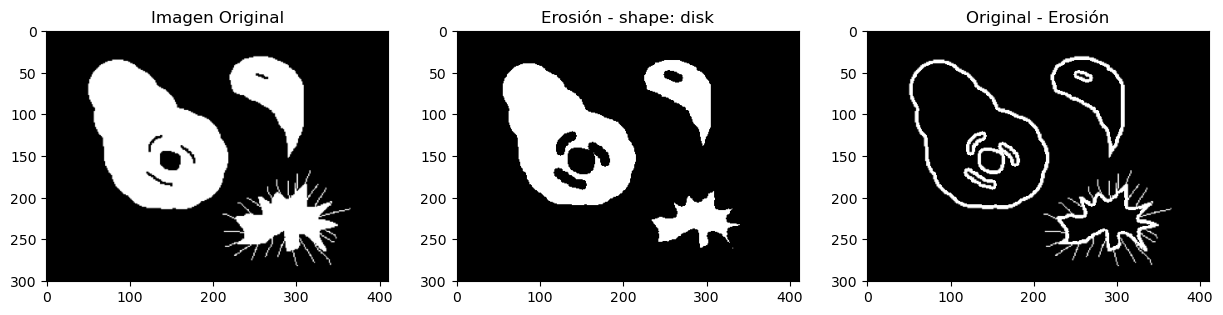

In [8]:
#Crear máscaras
elem1 = morph.rectangle(5,5)
elem2 = morph.disk(5)

#Leer imagen de entrada
img = skimage.io.imread('./res/M6/imagen_ejemplo1.png', as_gray=True)

#Aplicar una erosión de la imagen original bajo las máscaras creadas anteriormente
erosion1 = morph.binary_erosion(img,elem1)
erosion2 = morph.binary_erosion(img,elem2)

#Crear subplot 1x3 que muestra imagen original e imágenes erosionadas bajo las máscaras
fig, ax = plt.subplots(1,3, figsize=(15, 8))
ax[0].set_title('Imagen Original')
ax[0].imshow(img, cmap='gray')
ax[1].set_title('Erosión - shape: disk')
ax[1].imshow(erosion2, cmap='gray')
ax[2].set_title('Original - Erosión')
ax[2].imshow(img-erosion2, cmap='gray');

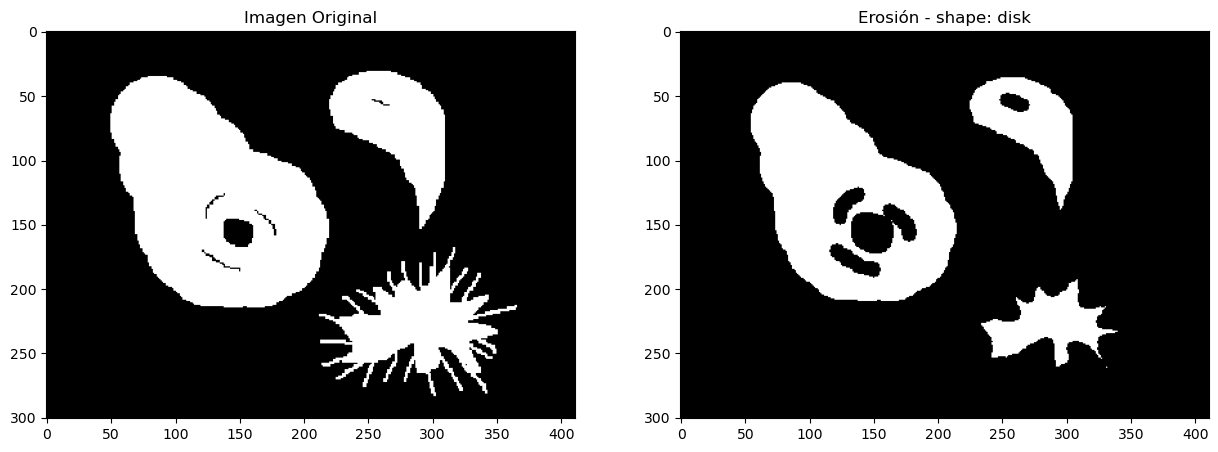

In [9]:
# Leer la imagen de entrada en escala de grises
img = cv2.imread('./res/M6/imagen_ejemplo1.png', 0)
_, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)

# Crear un disco de radio 5
kernel = morph.disk(5)

# Utilizar la función de erosión binaria de Opencv sobre la imagen de entrada con una iteración
erosion = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel, iterations = 1)

#Crear subplot 1x2 que muestre imagen original e imagen dilatada
fig, ax = plt.subplots(1,2, figsize=(15, 8))
ax[0].set_title('Imagen Original')
ax[0].imshow(img, cmap='gray')
ax[1].set_title('Erosión - shape: disk')
ax[1].imshow(erosion, cmap='gray');

**La erosión es acumulativa, es decir, si sobre la imagen resultante se vuelve a realizar la erosión, el área de la zona clara disminuye de nuevo.**

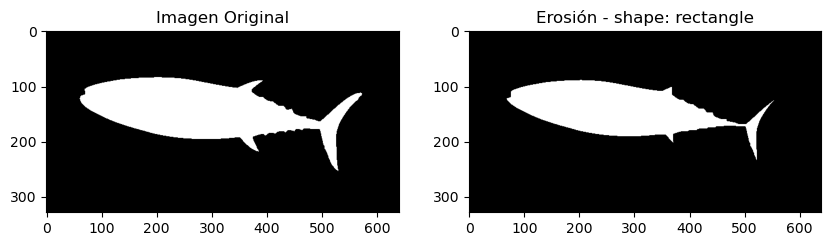

In [10]:
#Crear máscaras
elem1 = morph.rectangle(3,3)
elem2 = morph.disk(3)

#Leer imagen de entrada
img = skimage.io.imread('./res/segm/6.tif', as_gray=True)

#Aplicar erosión a la imagen de entrada bajo la máscara 1
erosion = morph.binary_erosion(img,elem1)

#Aplicar varias veces la función erosión
for i in range(4):
    erosion = morph.binary_erosion(erosion,elem1)

#Crear subplot 1x2 para mostrar la imagen y sus erosiones acumulativas
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 7))
ax1.set_title('Imagen Original')
ax1.imshow(img, cmap='gray')
ax2.set_title('Erosión - shape: rectangle')
ax2.imshow(erosion, cmap='gray');

<center><i>Figura. Ejemplo de erosión para el adelgazamiento de patrones en huellas dactilares..</i>

<img src="res/M6/ejemplo_erosion2.png" alt="" style="width:620px"></center>
<hr>

Existen muchas aplicaciones de esta operación. Una de las mas comunes es separar objetos que se tocan en la imagen para luego ser contados mediante otro algoritmo:

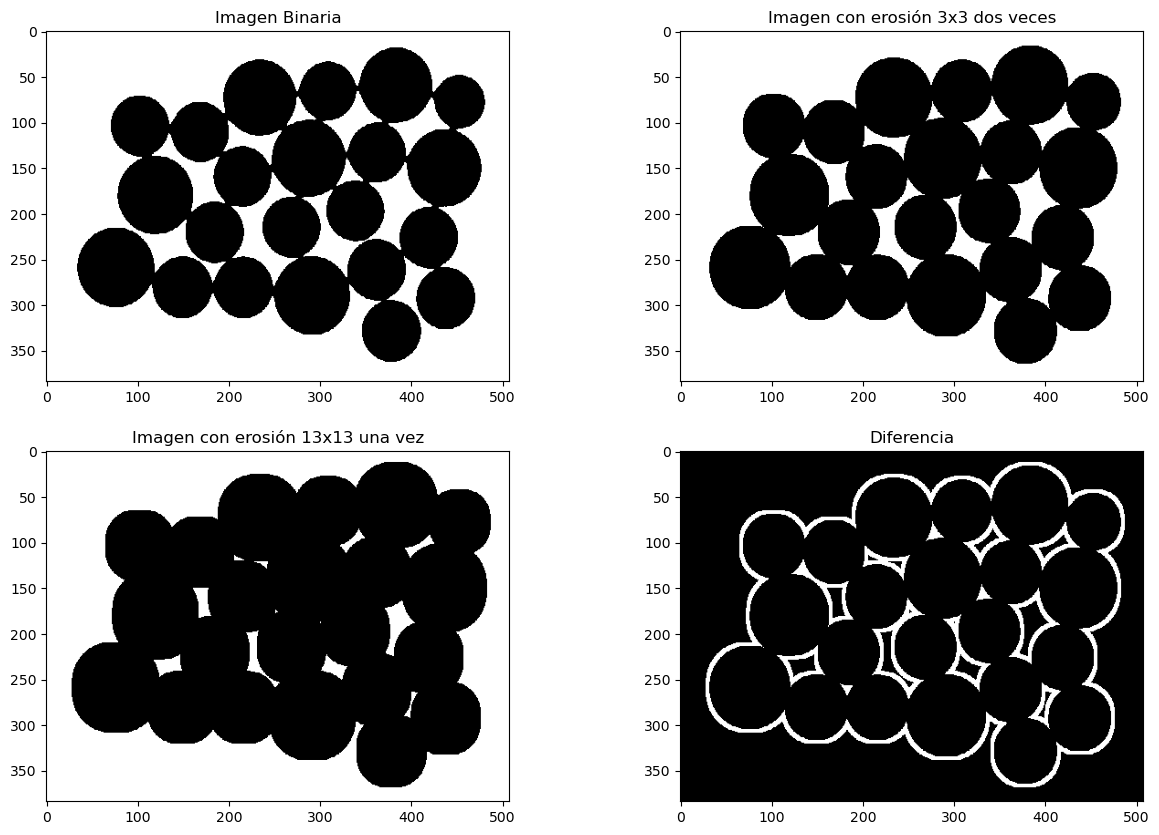

In [11]:
#Crear las máscaras rectangulares de distinto tamaño
selem1 = morph.rectangle(3,3)
selem2 = morph.rectangle(13,13)
selem3 = morph.rectangle(9,9)

#Leer imagen de entrada y binarizarla en una variable nueva
img = cv2.imread('./res/M6/monedas.jpg', 0)
_, img = cv2.threshold(img, 90, 255, cv2.THRESH_BINARY)

#Aplicar erosión acumulativa sobre la imagen de entrada
erosion_once3 = cv2.erode(img,selem1)
erosion_double3 = cv2.erode(erosion_once3,selem1)
#Aplicar erosión sobre la imagen binarizada y luego una dilatación bajo las máscaras 2 y 3 respectivamente
erosion_once13 = cv2.erode(img,selem2)

#Crear un subplot 2x2 que muestre imagen de entrada e imágenes bajo erosiones y la diferencia para bordes
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(15,10))
ax1.set_title('Imagen Binaria')
ax1.imshow(img, cmap='gray')
ax2.set_title('Imagen con erosión 3x3 dos veces')
ax2.imshow(erosion_double3, cmap='gray')
ax3.set_title('Imagen con erosión 13x13 una vez')
ax3.imshow(erosion_once13, cmap='gray')
ax4.set_title('Diferencia')
ax4.imshow(cv2.bitwise_xor(erosion_once13,erosion_double3), cmap='gray');

**NOTA:** Al momento de leer imágenes, es importante binarizarlas ya que en muchos casos los bordes se guardan como gradientes de intensidad.

- Cuando se utilizan elementos estructurales muy grandes, ¿por qué uno de tipo disco o circular tiende a preservar mejor las formas que uno cuadrado?

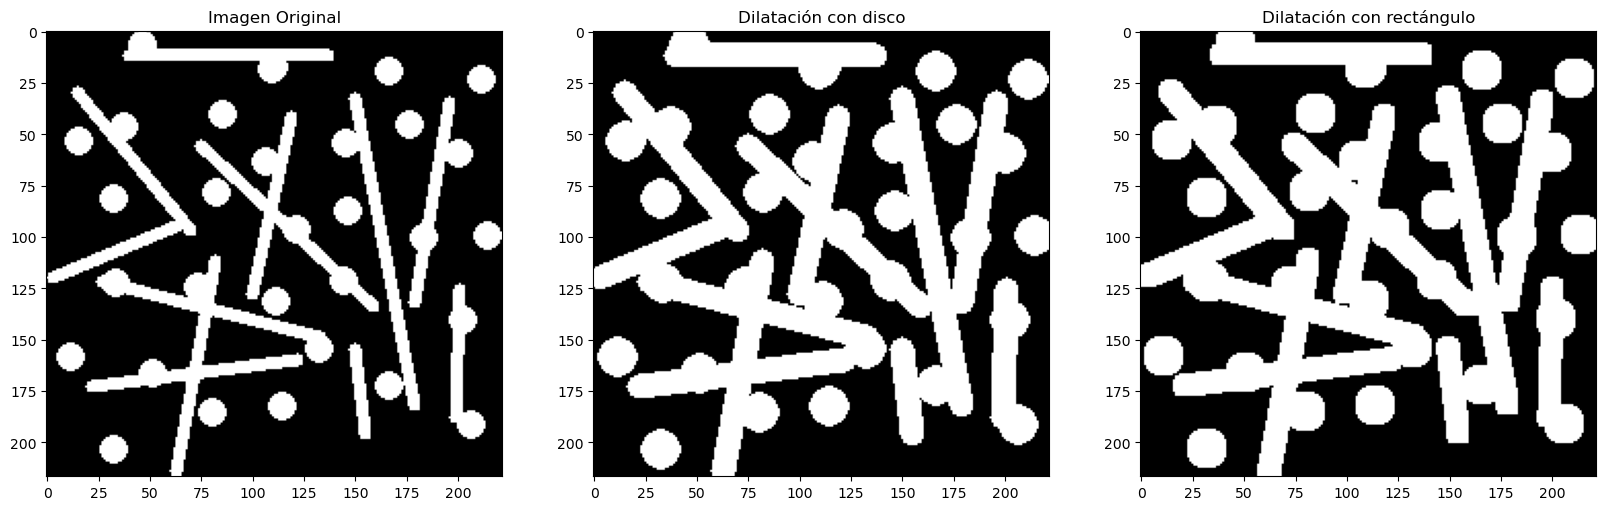

In [12]:
#Crear las máscaras
elem1 = morph.disk(3)
elem2 = morph.rectangle(6,6)

#Leer imagen de entrada
img = skimage.io.imread('./res/M6/imagen_ejemplo3.png', as_gray=True)

#Realizar dilataciones a la imagen de entrada bajo un disco y el rectángulo
dilation_circle = morph.binary_dilation(img,elem1)
dilation_square = morph.binary_dilation(img,elem2)

#Crear subplot 1x3 para mostrar imagen de entrada y dilatadas
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20, 20))
ax1.set_title('Imagen Original')
ax1.imshow(img, cmap='gray')
ax2.set_title('Dilatación con disco')
ax2.imshow(dilation_circle, cmap='gray')
ax3.set_title('Dilatación con rectángulo')
ax3.imshow(dilation_square, cmap='gray');

Utilice la erosión para obtener los bordes de la imagen './res/M6/imagen_ejemplo2.gif'. ¿Es el resultado el mismo que el obtenido utilizando la dilatación?
<hr>

'Respuesta: No, no es lo mismo, la forma en que quedan difiere, una es sacar bordes hacia dentro y otra hacia afuera'

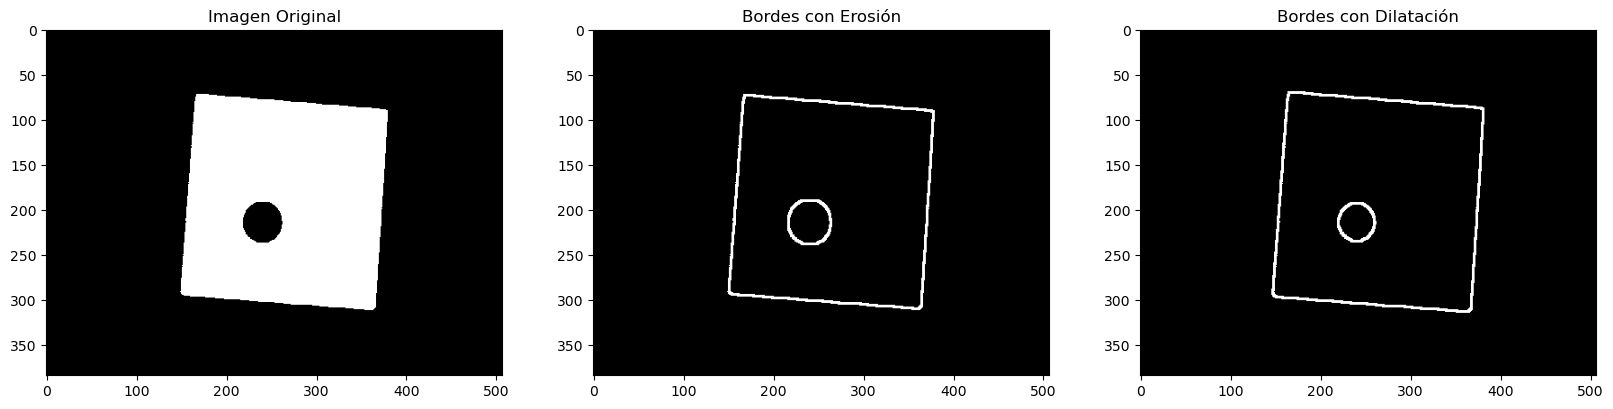

In [13]:
""" Solución ejercicio propuesto """
#Crear la máscara
selem = morph.rectangle(7,7)

#Leer imagen de entrada y binarizarla
img = skimage.io.imread('./res/M6/imagen_ejemplo2.gif', as_gray=True)
img = img > 0 #forma binarizar la imagen de entrada
#Los .gif al leerlos quedan con un tamaño de 1 en la primera dimensión, en las otras está la información
img = np.reshape(img, (img.shape[1], img.shape[2]))

#Realizar extracción de bordes bajo dilatación y erosión
dilatacion = morph.binary_dilation(img,selem)
erosion = morph.binary_erosion(img,selem)

#Crear subplot 1x3 que muestre imagen original y bordes
fig, ax = plt.subplots(1,3, figsize=(20, 10))
ax[0].set_title('Imagen Original')
ax[0].imshow(img, cmap='gray')
ax[1].set_title('Bordes con Erosión')
ax[1].imshow(np.logical_xor(img,erosion), cmap='gray')
ax[2].set_title('Bordes con Dilatación')
ax[2].imshow(np.logical_xor(img, dilatacion), cmap='gray');

"""Respuesta: No, no es lo mismo, la forma en que quedan difiere, una es sacar bordes hacia dentro y otra hacia afuera"""

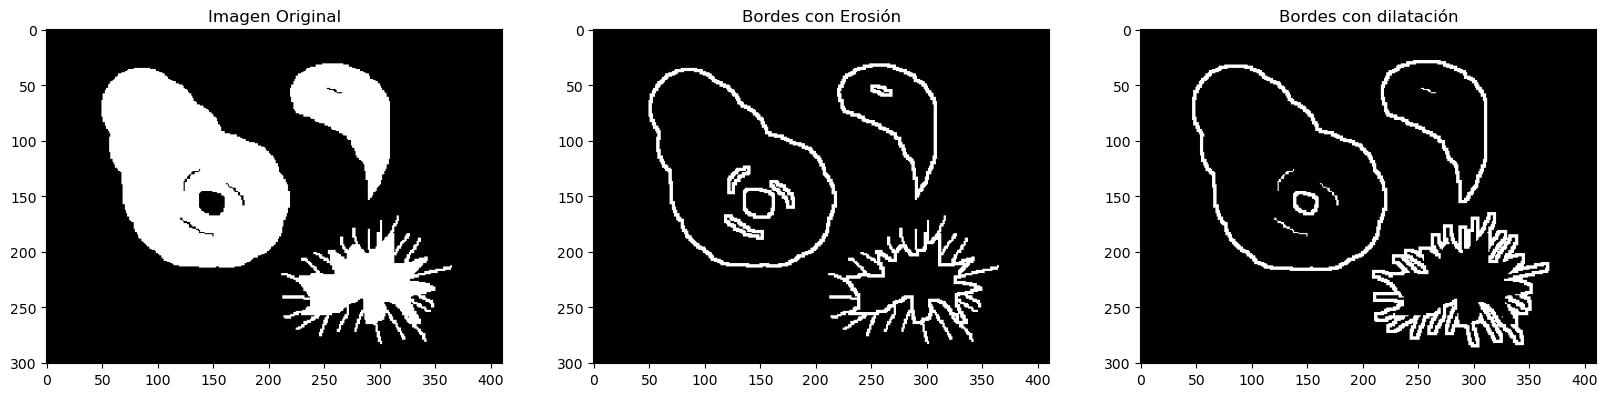

In [14]:
#Crear la máscara
selem = morph.rectangle(7,7)

#Leer imagen de entrada y binarizarla
img = skimage.io.imread('./res/M6/imagen_ejemplo1.png', as_gray=True)
img = img > 0 #forma binarizar la imagen de entrada

#Realizar extracción de bordes bajo dilatación y erosión
dilatacion = morph.binary_dilation(img,selem)
erosion = morph.binary_erosion(img,selem)

#Crear subplot 1x3 que muestre imagen original y bordes
fig, ax = plt.subplots(1,3, figsize=(20, 10))
ax[0].set_title('Imagen Original')
ax[0].imshow(img, cmap='gray')
ax[1].set_title('Bordes con Erosión')
ax[1].imshow(np.logical_xor(img,erosion), cmap='gray')
ax[2].set_title('Bordes con dilatación')
ax[2].imshow(np.logical_xor(img, dilatacion), cmap='gray');

**La dilatación y erosión son transformaciones NO INVERTIBLES. Si una imagen es erosionada y luego dilatada, la imagen original NO se recupera. En efecto, el resultado es una imagen más simplificada y menos detallada que la imagen original.**

- (a) es una imagen original con cuadrados de tamaño 1,3,5,7,9 y 15 px.
- (b) es la erosión de la imagen (a) usando un elemento estructurante de 13x13 px.
- (c) es la dilatación de la imagen (b) usando el mismo elemento estructurante.


<center><i>Figura. Transformaciones NO INVERTIBLES.</i>

<img src="res/M6/ejemplo_erosion3.png" alt="" style="width:620px"></center>
<hr>

Adicionalmente, puede realizarse una diferencia entre la imagen erosionada y la imagen dilatada, es conocida como una transformación morfológica de gradientes.

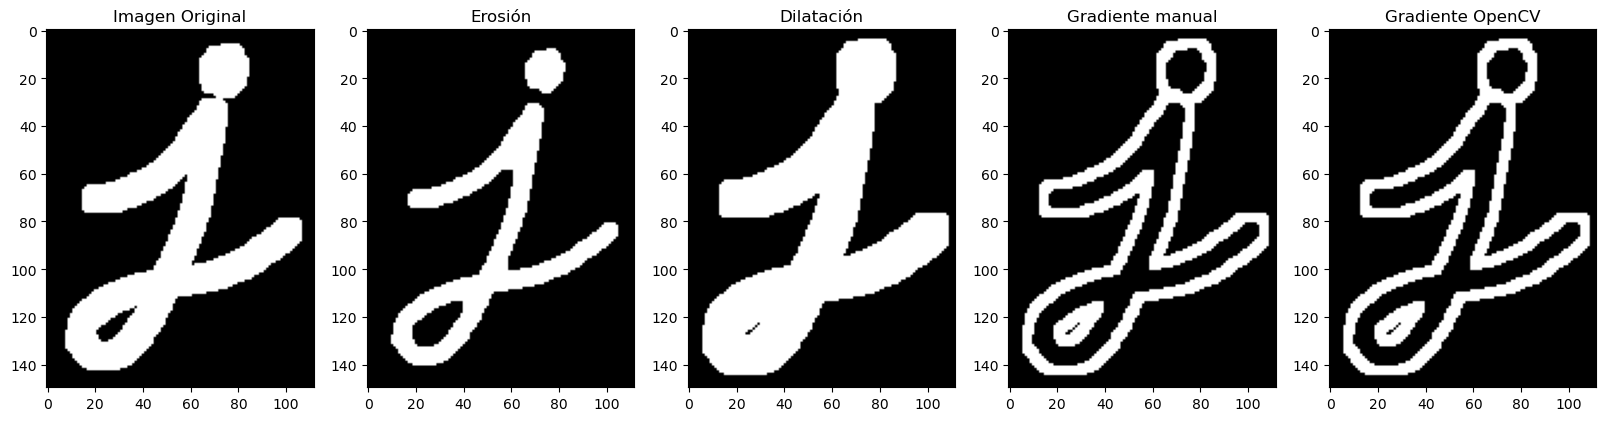

In [15]:
#Leer imagen de entrada
img = skimage.io.imread('./res/digit.png', as_gray=True)
#Crear un kernel
kernel = np.ones((5,5),np.uint8)

#Aplicar la operación gradiente de OpenCv con el kernel, calcular erosión y dilatación
dilatacion = morph.binary_dilation(img,kernel)
erosion = morph.binary_erosion(img,kernel)
# Aquí se uso el bitwise_xor en lugar de logical_xor, pues el bitwise puede operar tanto enteros como booleanos
gradient1 = np.bitwise_xor(erosion,dilatacion)
gradientCV = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

#Crear figura que muestre las imagenes
fig, ax = plt.subplots(1,5, figsize=(20, 10))
ax[0].set_title('Imagen Original')
ax[0].imshow(img, cmap='gray')
ax[1].set_title('Erosión')
ax[1].imshow(erosion, cmap='gray')
ax[2].set_title('Dilatación')
ax[2].imshow(dilatacion, cmap='gray')
ax[3].set_title('Gradiente manual')
ax[3].imshow(gradient1, cmap='gray')
ax[4].set_title('Gradiente OpenCV')
ax[4].imshow(gradientCV, cmap='gray');

Recordemos que no puede realizarse una resta directamente sobre booleanos.

## 2.3 Apertura
La apertura generalmente de un conjunto A por el elemento estructural B, suaviza los contornos de un objeto, rompe uniones angostas (istmos), elimina salientes finas y abre pequeños huecos. También puede eliminar franjas o zonas de un objeto que sean *más estrechas* que el elemento estructural.

<center><i>Figura. Ejemplo de apertura.</i>

<img src="res/M6/ejemplo_apertura1.png" alt="" style="height:300px"></center>

Una propiedad importante de la apertura, es que puede ser utilizada para extraer elementos de la imagen:

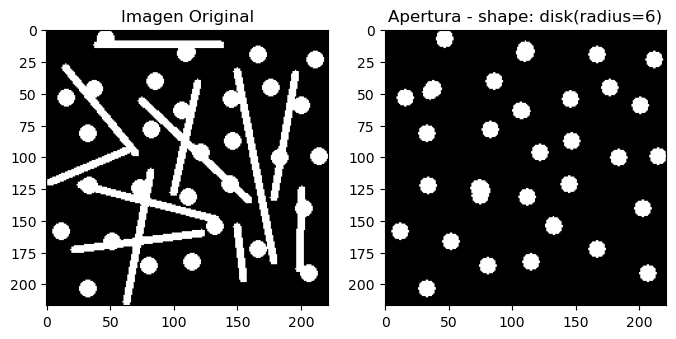

In [16]:
#Definir radio y crear una máscara
radius = 6
selem = morph.disk(radius)

#Leer imagen de entrada y realizar una apertura con la máscara creada bajo la función de skimage, los parámetros son los mismos que erosión y dilatación
img = skimage.io.imread('./res/M6/imagen_ejemplo3.png', as_gray=True)
apertura = morph.binary_opening(img,selem)

#Crear subplot 1x2 que muestre imagen original y apertura
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8, 4))
ax1.set_title('Imagen Original')
ax1.imshow(img, cmap='gray')
ax2.set_title('Apertura - shape: disk(radius='+str(radius)+')')
ax2.imshow(apertura, cmap='gray');

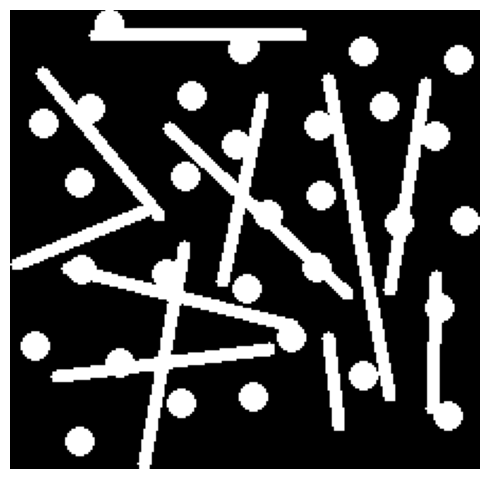

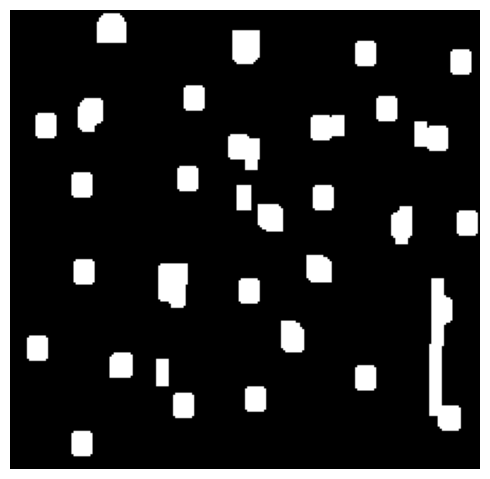

In [17]:
img = cv2.imread('./res/M6/imagen_ejemplo3.png', 0)
kernel = morph.rectangle(10, 6)

apertura = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations = 1)

show_image(img)
show_image(apertura)

<center><i>Figura. Extracción de objetos utilizando apertura.</i>

<img src="res/M6/ejemplo_apertura2.png" alt="" style="width:800px"></center>
<hr>

### Practiquemos
¿De qué forma podríamos eliminar los elementos horizontales y verticales de la siguiente imagen '.res/M6/imagen_ejemplo4.gif', utilizando como base la implementacion anterior?

<center><i>Figura. Ejercicio.</i>

<img src="res/M6/imagen_ejemplo4.png" alt="" style="width:200px"></center>
<hr>

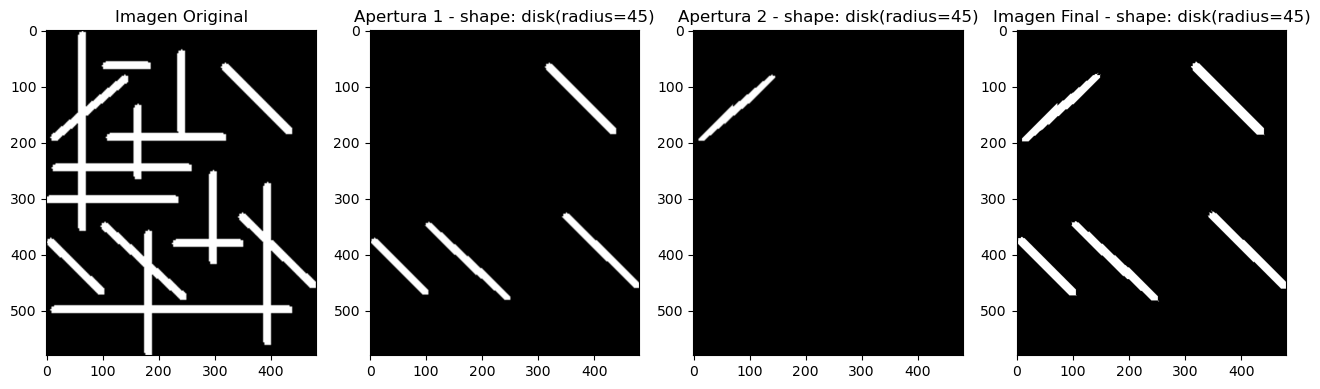

In [18]:
radius = 45
# Estructura para las líneas diagonales hacia la derecha
elem1 = np.identity(radius, dtype=np.uint8)
# Estructura para las líneas diagonales hacia la izquierda
elem2 = np.flip(elem1, axis=1)

#Leer imagen de entrada
img = skimage.io.imread('./res/M6/imagen_ejemplo5.png', as_gray=True)

#Realizar una apertura bajo la máscara identidad
apertura = cv2.morphologyEx(img, cv2.MORPH_OPEN, elem1)
apertura2 = cv2.morphologyEx(img, cv2.MORPH_OPEN, elem2)

#Crear subplot 1x2 que muestre imagen original e imagen bajo apertura
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(16, 8))
ax1.set_title('Imagen Original')
ax1.imshow(img, cmap='gray')
ax2.set_title('Apertura 1 - shape: disk(radius='+str(radius)+')')
ax2.imshow(apertura, cmap='gray')
ax3.set_title('Apertura 2 - shape: disk(radius='+str(radius)+')')
ax3.imshow(apertura2, cmap='gray')
ax4.set_title('Imagen Final - shape: disk(radius='+str(radius)+')')
ax4.imshow(np.logical_or(apertura,apertura2), cmap='gray');

## 2.4 Cierre

El cierre de un conjunto A por el elemento estructurante B, se define como:

$$A \cdot B = (A \oplus B) \ominus B$$

El cierre también suaviza los contornos pero, a diferencia de la apertura, generalmente, fusiona las hendiduras finas y largas presentes en los objetos, elimina agujeros pequeños y rellena brechas en el contorno uniendo objetos cercanos.

<center><i>Figura. Cierre.</i>

<img src="res/M6/cierre.png" alt="" style="height:200px"></center>

<br>

<center><i>Figura. Proceso de cierre.</i>

<img src="res/M6/ejemplo_cierre1.png" alt="" style="height:300px"></center>

<br>

<center><i>Figura. Ejemplo de cierre.</i>

<img src="res/M6/ejemplo_cierre2.png" alt="" style="width:700px"></center>

Podemos utilizar el cierre para extraer objetos oscuros en fondos claros:

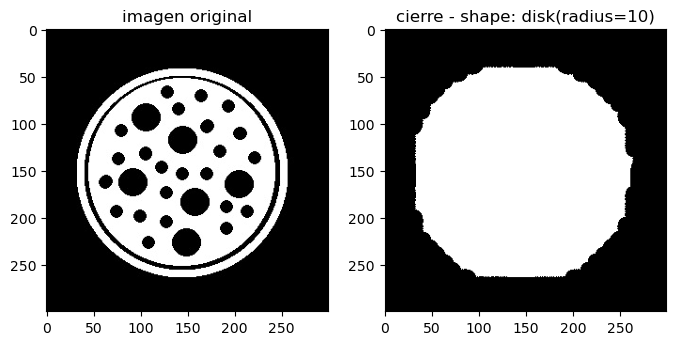

In [19]:
#Crear máscara
radius = 10
selem = morph.disk(radius)

#Leer imagen de entrada y aplicar la operación cierre de skimage, cuyos parámetros
#requieren imagen de entrada y una máscara
img = skimage.io.imread('./res/M6/ejercicio_cierre2.jpg', as_gray=True)
cierre = morph.binary_closing(img,selem)

#Crear subplot 1x2 que muestre imagen original e imagen bajo cierre
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8, 4))
ax1.set_title('imagen original')
ax1.imshow(img, cmap='gray')
ax2.set_title('cierre - shape: disk(radius='+str(radius)+')')
ax2.imshow(cierre, cmap='gray');

## 2.5 Otras Operaciones

### 2.5.1 Extracción de Bordes

Una forma fácil de **extraer bordes** es usando las operaciones morfológicas. Dada una imagen A, sus bordes se pueden obtener, primero erosionando A por un elemento estructurante apropiado B, y posteriormente realizando la diferencia entre A y su erosión. Es decir:

$$F(A)=A-(A \ominus B)$$

El elemento estructurante B usado más frecuentemente es una 8-vecindad (como en el ejemplo que se muestra a continuación). También se usan otros tamaños de ventana, por ejemplo usando una ventana de 5x5 se ampliaría el grosor del borde resultado en entre dos y tres píxeles.

<center><i>Figura. Extraccion de bordes mediante operaciones morfologicas.</i>

<img src="res/M6/bordes1.png" alt="" style="width:620px"></center>
<hr>

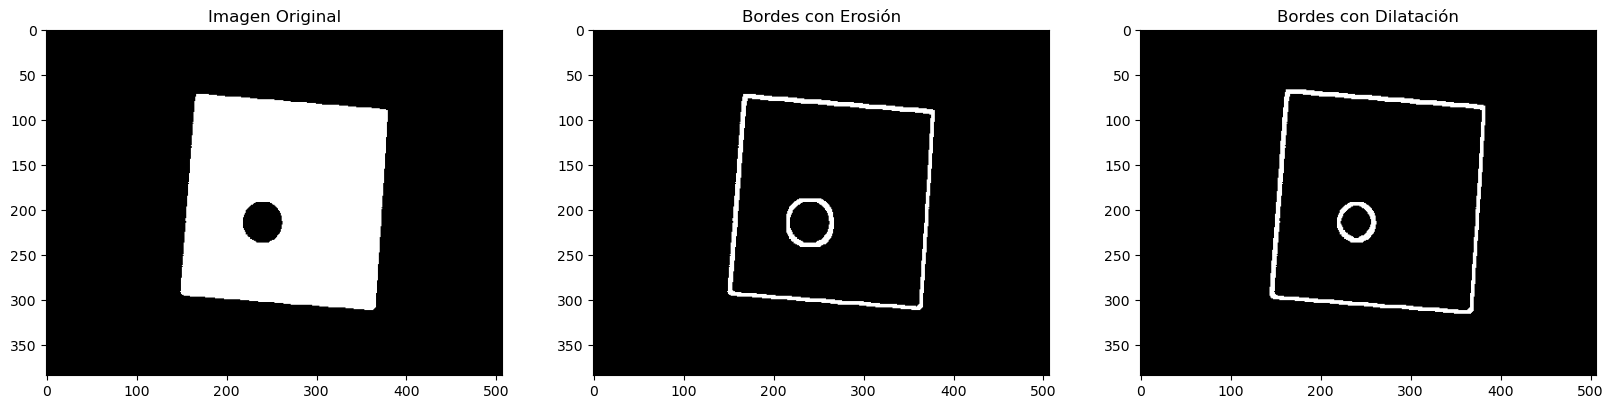

In [20]:
#Crear máscara
selem = morph.rectangle(10,10)

#Leer imagen de entrada y binarizarla
img = skimage.io.imread('./res/M6/imagen_ejemplo2.png', as_gray=True)
img = img > 0 #forma binarizar la imagen de entrada

#Aplicar dilatación y erosión a la imagen original bajo la máscara rectangular
dilatacion = morph.binary_dilation(img,selem)
erosion = morph.binary_erosion(img,selem)

#Crear subplot 1x3 que muestre imagen original, bordes con erosión y dilatación
fig, ax = plt.subplots(1,3, figsize=(20, 10))
ax[0].set_title('Imagen Original')
ax[0].imshow(img, cmap='gray')
ax[1].set_title("Bordes con Erosión")
ax[1].imshow(np.logical_xor(img,erosion), cmap='gray')
ax[2].set_title('Bordes con Dilatación')
ax[2].imshow(np.logical_xor(img, dilatacion), cmap='gray');

### 2.5.2 Relleno de Agujeros
- En ciertas aplicaciones, es conveniente poder reconstruir una imagen que ha sufrido varias erosiones o poder llenar un objeto que está definido por un borde, a esto se le conoce como **Relleno de Regiones**.

- Para iniciar el relleno debemos empezar en un punto P (denominado semilla) que se encuentre dentro de la frontera que queremos rellenar. El siguiente procedimiento, entonces, rellena la región determinada por el punto P:

$$X_k = (X_{k-1} \oplus B)\cap A^c, k=\left\{1,2,3,...\right\}$$


- Donde $X_0=P$, y $B$ es el elemento estructural. El algoritmo converge cuando $X_k = X_k-1$, es decir, cuando el punto que sigue a rellenar, ya ha sido rellenado. El conjunto resultante de la unión de $X_k$ y $A$ contiene a la región rellenada y su borde.

<center><i>Figura. Proceso de relleno regiones.</i>

<img src="res/M6/relleno_huecos.png" alt="" style="width:700px"></center>

/tmp/ipykernel_28279/3594568592.py:7: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  filled = morph.remove_small_holes(img,area_threshold=800) #area_threshold es el area en pixeles de los huecos a rellenar


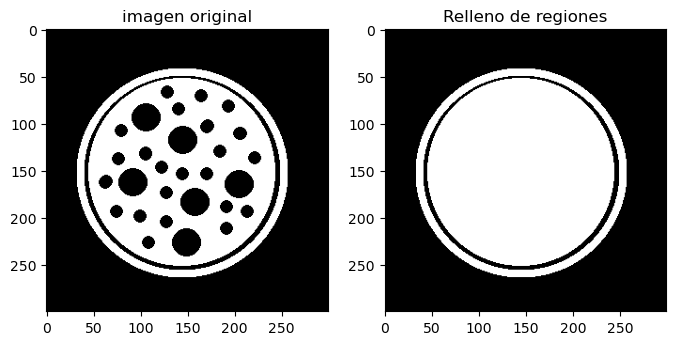

In [21]:
#Leer imagen de entrada y binarizarla
img = cv2.imread('./res/M6/ejercicio_cierre2.jpg', 0)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

#Realizar un llenado de agujeros pequeños, cuyos parámetros son la imagen que deseo rellenar
#y el área mínima a partir de la cual se llenará el hueco
filled = morph.remove_small_holes(img,area_threshold=800) #area_threshold es el area en pixeles de los huecos a rellenar

#Crear subplot 1x2 que muestre imagen original e imagen rellena
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8, 4))
ax1.set_title('imagen original')
ax1.imshow(img, cmap='gray')
ax2.set_title('Relleno de regiones')
ax2.imshow(filled, cmap='gray');

### 2.5.3 Remoción de Objetos Pequeños
Mediante técnicas de morfología también es posible eliminar objetos cuya área en píxeles sea menor a un umbral dado.

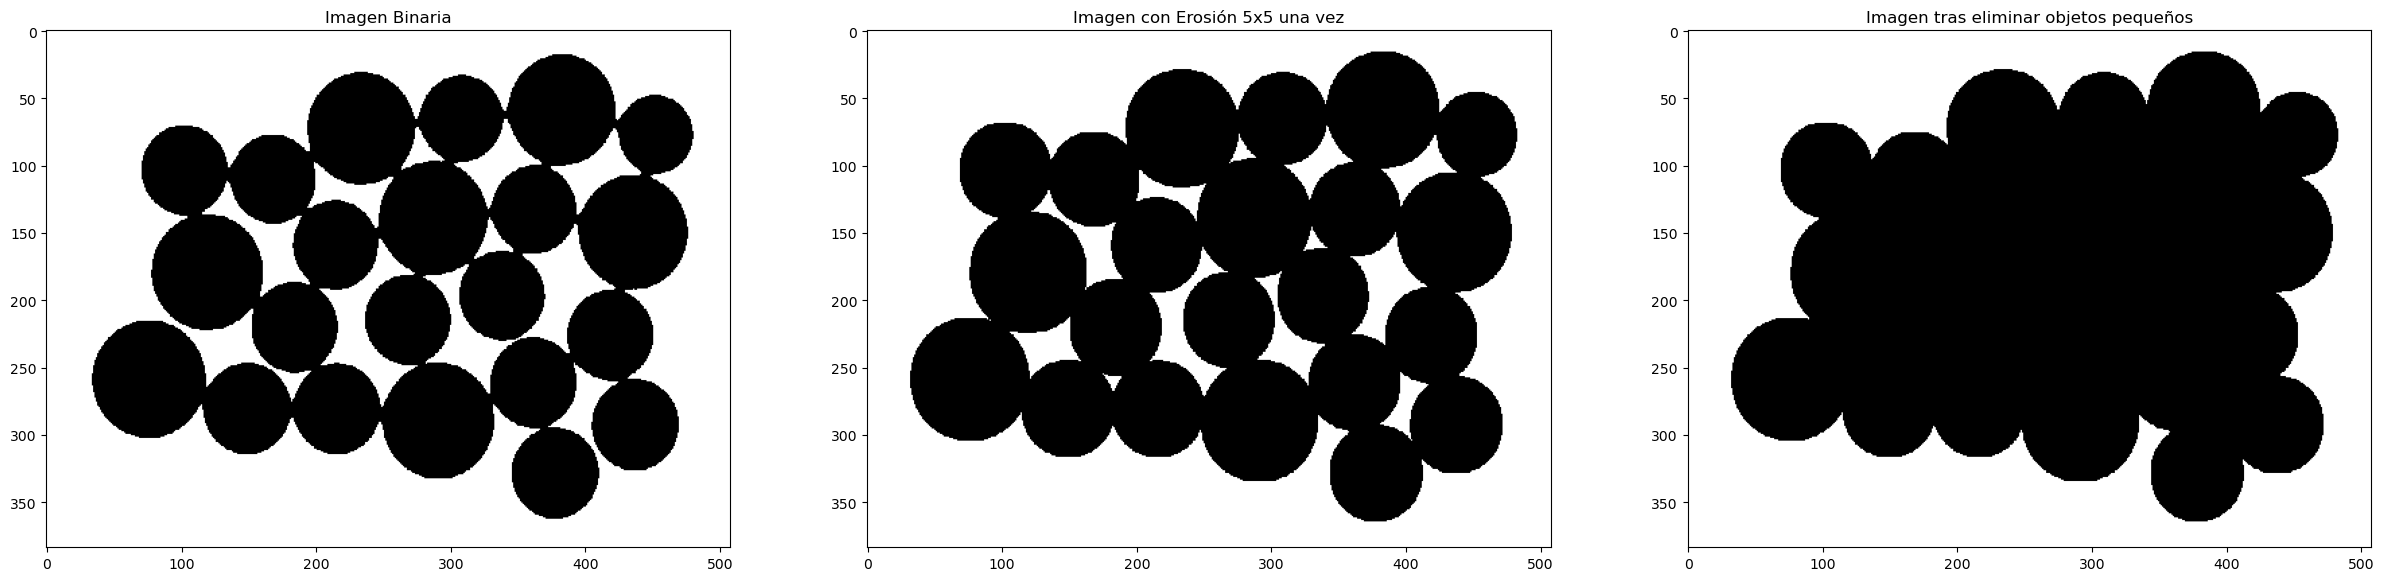

In [22]:
#Crear la máscara rectangular
selem = morph.rectangle(5,5)

#Leer imagen de entrada y binarizarla en una copia
img = cv2.imread('./res/M6/monedas.jpg', 0)
_, imgB = cv2.threshold(img, 90, 255, cv2.THRESH_BINARY)

#Aplicar erosión previa sobre la copia bajo la máscara rectangular
erosion_once5 = morph.binary_erosion(imgB,selem)

#Aplicar la función de skimage de eliminación de objetos pequeños, usando la erosión previa para poder eliminar los espacios entre monedas
objetos_pequeños_eliminados = morph.remove_small_objects(erosion_once5,min_size = 2000, connectivity = 1)

#Crear subplot 1x3 que muestre imagen original, bajo una erosión y bajo eliminación de objetos pequeños
fig, ((ax1,ax2,ax3)) = plt.subplots(1,3, figsize=(30,20))

ax1.set_title('Imagen Binaria')
ax1.imshow(imgB, cmap='gray')
ax2.set_title('Imagen con Erosión 5x5 una vez')
ax2.imshow(erosion_once5, cmap='gray')
ax3.set_title('Imagen tras eliminar objetos pequeños')
ax3.imshow(objetos_pequeños_eliminados, cmap='gray');

### 2.5.4 Etiquetado de Regiones / Componentes Convexas
Una región es un conjunto de pixeles donde cada pixel puede ser alcanzado desde otro pixel (en la región) por un número finito de pasos, donde cada paso se inicia en un pixel y termina en el pixel de su vecindad.

Así, dos píxeles con la misma etiqueta, $C$, están conectados si existe un camino de uno al otro a través de píxeles vecinos con la misma etiqueta.

* La noción de objeto está ligada a la  vecindad utilizada.
* La imagen contiene un objeto, ó más, según  consideremos vecindad a 8 ó a 4, respectivamente.

<center><i>Figura. Etiquetado de regiones.</i>

<img src="res/eight.png" alt="" style="width:150px"></center>

Los algoritmos de etiquetado de regiones procesan una fila de la imagen en cada momento y  generalmente recorren la imagen de izquierda a derecha y de arriba a bajo:

Recorriendo la imagen, para cada valor 1 en la imagen se deben examinar sus vecinos (depende de si es una 4-neighbours o 8-neighbours):
* Si todos tienen valor 0, asignar una nueva etiqueta al píxel.
* Si sólo uno de los vecinos tiene valor 1, asignar la etiqueta de este vecino.
* Si todos tienen la misma etiqueta, asignar la etiqueta de estos.
* Si hay más de un vecino con valor 1 y tienen etiquetas diferentes, asignar la etiqueta de uno de ellos y anotar que estas etiquetas son iguales.
* Renombrar las etiquetas teniendo en cuenta aquellas que son iguales.


<center><i>Figura. Etiquetado.</i>

<img src="res/etiquetado.png" alt="" style="width:700px"></center>

Esto también se puede interpretar desde la morfología matemática. Supongamos que $Y$ representa una componente conexa contenida en un conjunto $A$ y supongamos que conocemos un punto *$p$* que pertenece a dicha región. Entonces, el siguiente procedimiento puede utilizarse para extraer $Y$. Esto se conoce como **extracción de componentes conexas**:

$$X_0 = p$$
$$X_k = (X_{k-1} \oplus B) \cap A, k=1,2,3...$$

- El algoritmo termina en la iteración $k$ si $X_{k-1}=X_k$. Con $Y=X_k$</li>
- B es el elemento estructural cuadrado de $3\times3$</li>

<center><i>Figura. Extracción de componentes conexas utilizando morfología.</i>

<img src="res/M6/conexas.png" alt="" style="width:700px"></center>
<hr>

Número de etiquetas determinadas: 7


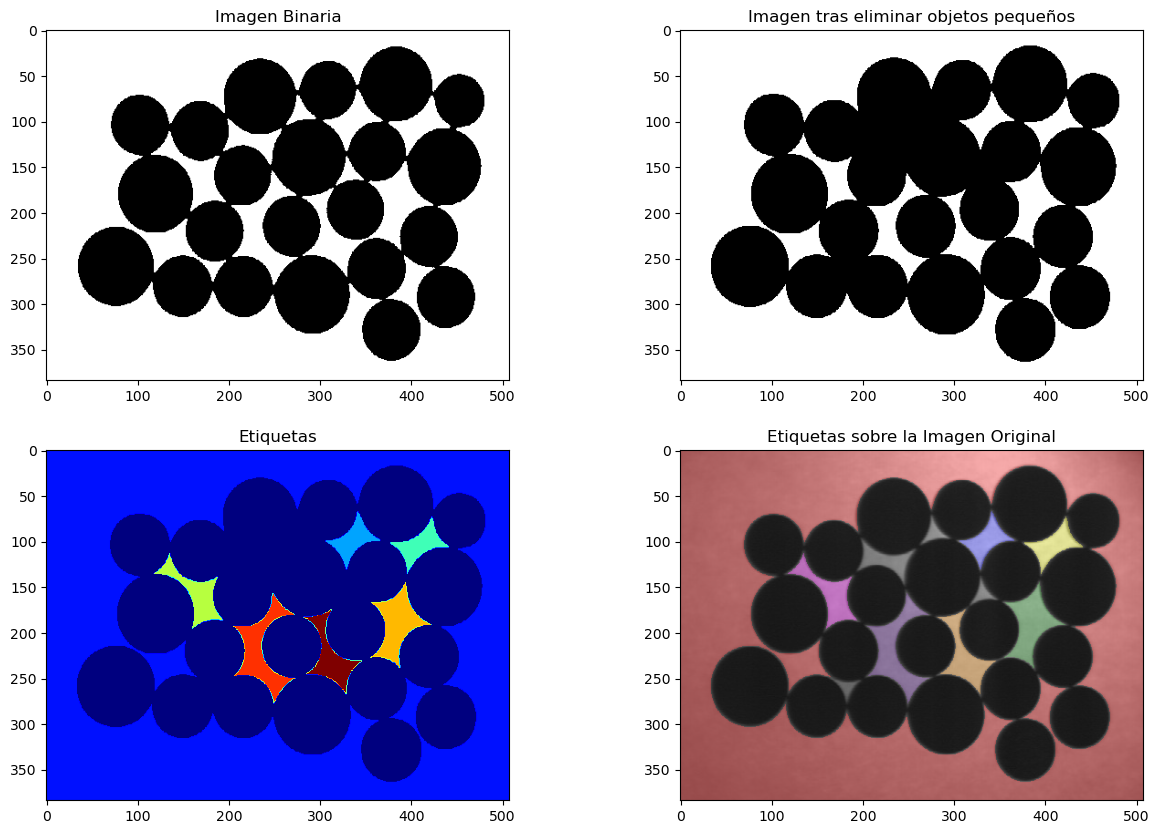

In [23]:
#Crear máscara
selem = morph.rectangle(3,3)

#Leer imagen de entrada y binarizarla en una copia
img = cv2.imread('./res/M6/monedas.jpg', 0)
_, imgB = cv2.threshold(img, 80, 255, cv2.THRESH_BINARY)

#Aplicar una erosión sobre la imagen copia
erosion_once5 = morph.binary_erosion(imgB,selem)

#Aplicar una eliminación de objetos pequeños sobre la imagen erosionada, esta vez con un menor tamaño de objeto "grande" para tener más etiquetas
objetos_pequeños_eliminados = morph.remove_small_objects(erosion_once5,min_size = 1000, connectivity = 1)

#Etiquetar la imagen mediante la función label de skimage, cuyos parámetros son la imagen, el ireturn de número de vecinos y la conectividad
labels, num_labels = morph.label(objetos_pequeños_eliminados, return_num=True, connectivity= 1)

#Caracterizar los labels, mediante colores y sobre la imagen original
image_label_overlay = color.label2rgb(labels, image=img)

#Generar subplot 2x2 para mostrar imagen original, eliminación de objetos pequeños(que actúa como máscara), y los labels de la información extraída
fig, ((ax1,ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(15,10))

ax1.set_title('Imagen Binaria')
ax1.imshow(imgB, cmap='gray')
ax2.set_title('Imagen tras eliminar objetos pequeños')
ax2.imshow(objetos_pequeños_eliminados, cmap='gray')
ax3.set_title('Etiquetas')
ax3.imshow(labels, cmap='jet')
ax4.set_title('Etiquetas sobre la Imagen Original')
ax4.imshow(image_label_overlay, cmap='jet');
#Imprime el número de etiquetas
print("Número de etiquetas determinadas:",num_labels)

### 2.5.5 Extracción de Esqueletos
El **Esqueleto** de una imagen es el arquetipo o soporte de los objetos que la componen. De manera informal, un esqueleto es una línea representante de un objeto tal que:

- Es de 1 píxel de grosor.
- Pasa por la “mitad” del objeto.
- Preserva la topología del objeto.

- El esqueleto intenta representar la forma de un objeto con un número relativamente pequeño de píxeles. De esta forma, todos los píxeles del esqueleto son estructuralmente necesarios.

- La posición, orientación y longitud de las líneas del esqueleto se corresponden con aquellas equivalentes de la imagen original. La tarea de sacar características de una imagen queda simplificada al obtener su esqueleto.

- El Esqueleto se puede expresar en términos de la erosión y la apertura como:
$$S(A)=\bigcup_{k=0}^{K}S_k(A)$$
$$S_k(A)=(A \ominus kB) - [(A \ominus kB) \circ B]$$
    

<center><i>Figura. Ejemplo de extracción de esqueleto.</i>

<img src="res/M6/skeleton1.png" alt="" style="width:500px"></center>

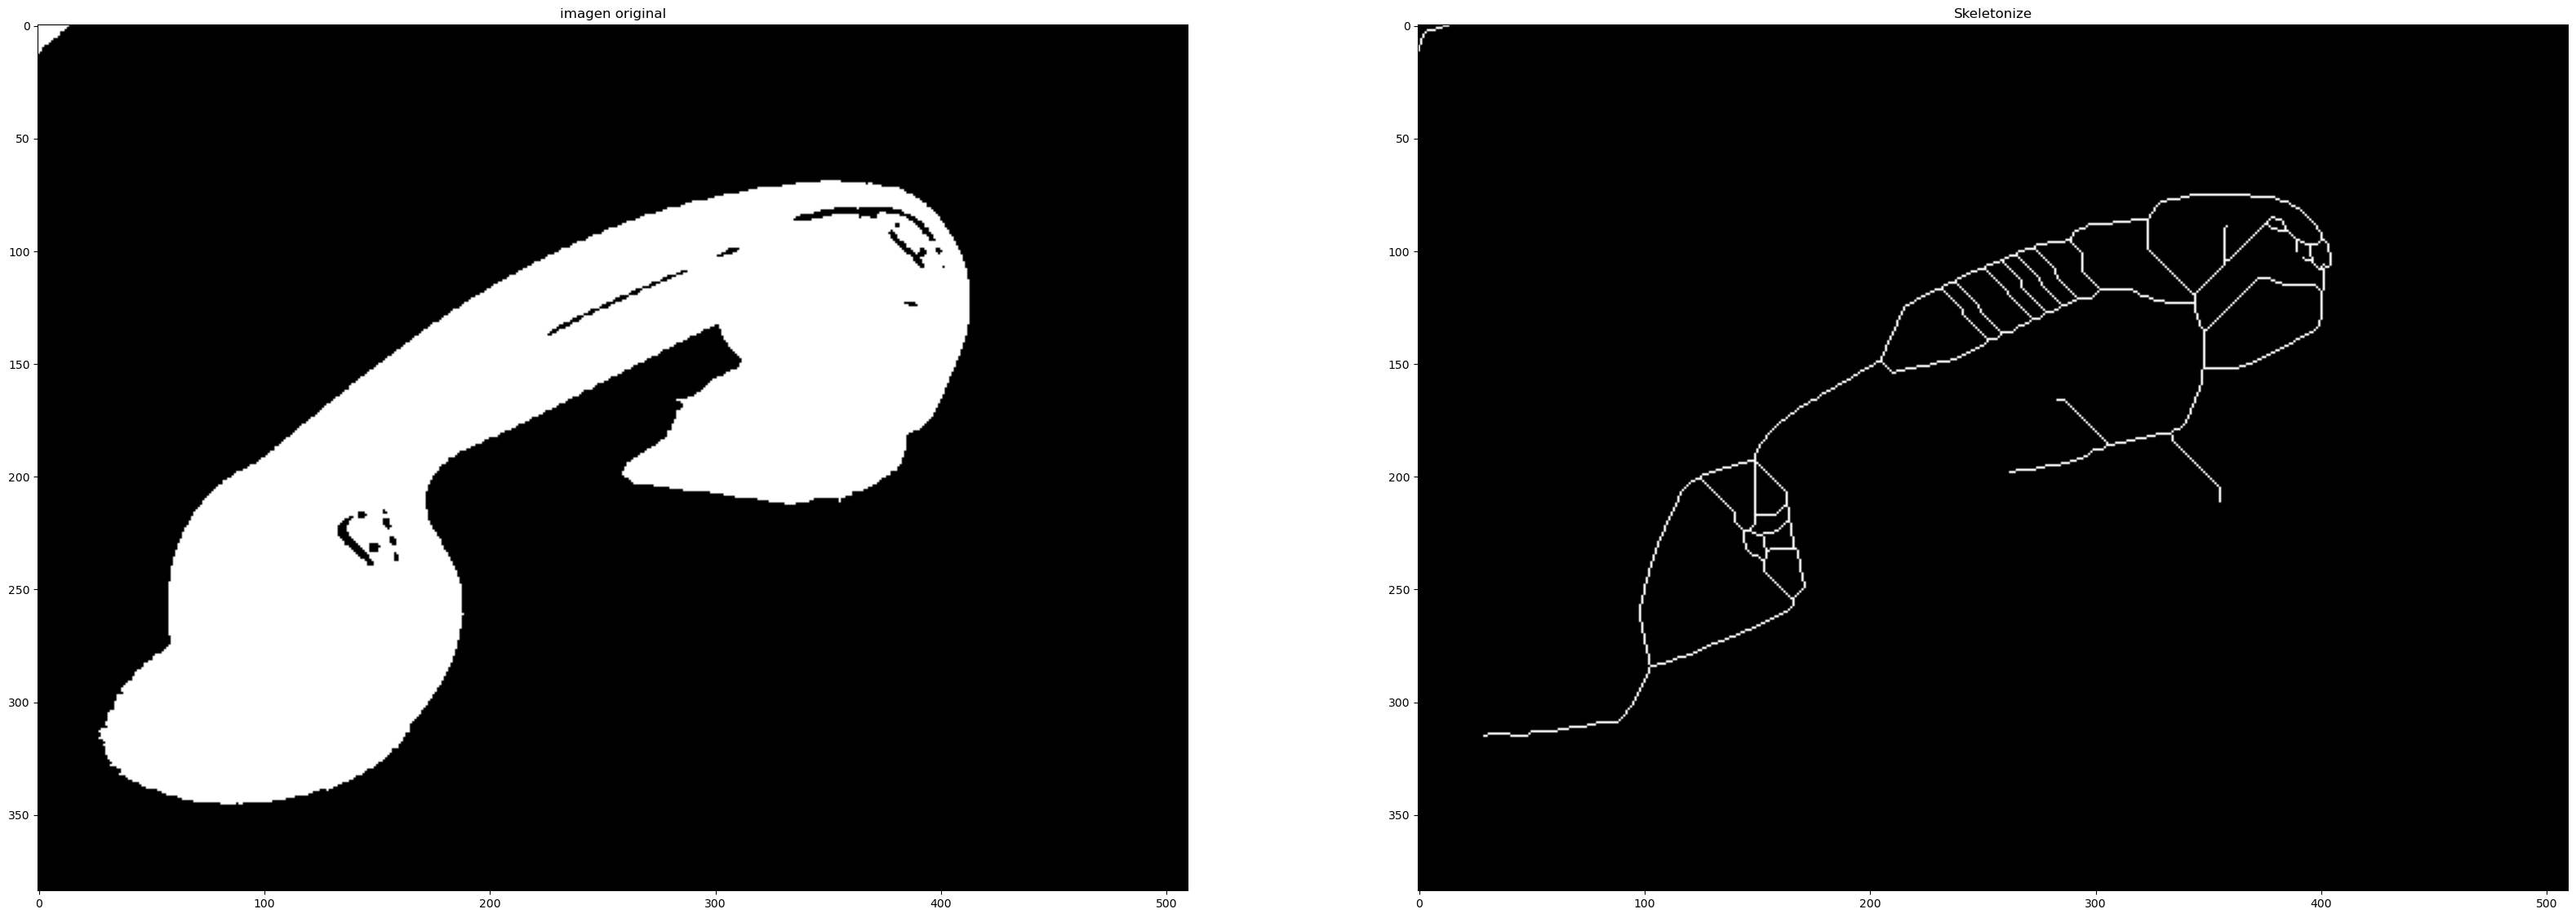

In [24]:
#Leer imagen de entrada y binarizarla
img = cv2.imread('./res/M6/telefono.jpg', 0)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)

#Aplicar la función de esquelización de skimage, cuyo único parámetro de entrada es la imagen
skeleton = morph.skeletonize(img)

#Crear subplot 1x2 que muestre imagen de entrada e imagen bajo esqueletización
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(40,40))
ax1.set_title('imagen original')
ax1.imshow(img, cmap='gray')
ax2.set_title('Skeletonize')
ax2.imshow(skeleton, cmap='gray');

Adicionalmente, para obtener el esqueleto de una imagen, no necesariamente debe utilizarse el método por defecto de skimage.morphology (Zhang), existen otros como el método de Lee.

Si la imagen es 2D se aplica por defecto skeletonize (método de Zhang) y si es 3D se aplica skeletonize_3d (método de Lee).

<center><i>Figura. Papers de algoritmos de esqueletización.</i>

<img src = "res/sc.png"></center>

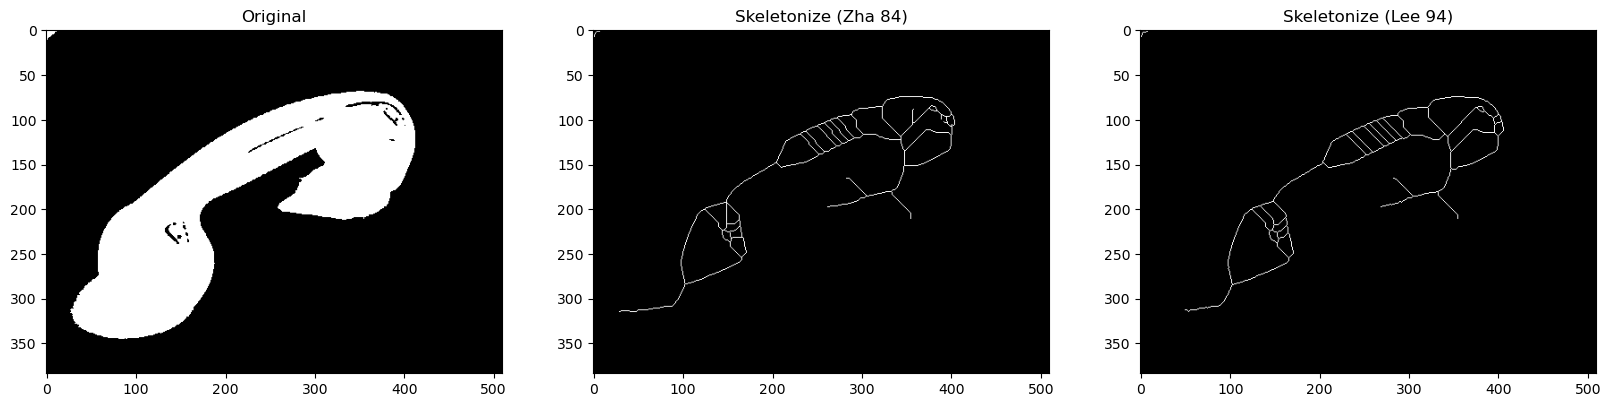

In [25]:
from skimage.morphology import skeletonize, skeletonize_3d

#Leer img de entrada y volverla binaria
data = cv2.imread('./res/M6/telefono.jpg', 0)
_, data = cv2.threshold(data, 128, 255, cv2.THRESH_BINARY_INV)

#Aplicar método de Zhang y Lee
skeleton = skeletonize(data)
skeleton_lee = skeletonize(data, method='lee')
#También se podía usar skeletonize_3d que por defecto usa el métod de Lee

#Plotear las respuestas 1x3
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
ax = axes.ravel()

ax[0].imshow(data, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].set_title('Skeletonize (Zha 84)')

ax[2].imshow(skeleton_lee, cmap=plt.cm.gray)
ax[2].set_title('Skeletonize (Lee 94)');

## Algunas conclusiones
La combinación de apertura y cierre se utiliza con frecuencia para limpiar una imagen segmentada antes de su posterior análisis. Pero... ¿qué operaciones usar y como combinarlas?

- La elección de si se debe usar apertura o cierre, o una secuencia de erosiones y dilataciones, depende de la imagen y el objetivo.

- La elección de un filtro morfológico está impulsada por el conocimiento disponible sobre la forma, tamaño y orientación de las estructuras que nos gustaría filtrar.

- La apertura se utiliza cuando la imagen tiene el ruido en primer plano o cuando queremos eliminar elementos largos y delgados. No se utiliza cuando existe la posibilidad de que la operación inicial de la erosión pueda desconectar las regiones.

- El cierre se utiliza cuando una región se ha desconectado y queremos restaurar la conectividad. No se utiliza cuando las diferentes regiones se encuentran cerca de tal manera que la primera iteración podría conectarlos.

- Por lo general, se debe balancear su uso entre la reducción del ruido y la retención de las características mediante pruebas de imágenes representativas.

### Ejemplo: ¿Cuántos dientes tiene el engranaje?

<center><i>Figura. Engranaje.</i>

<img src="res/M6/engranaje.png" alt="" style="width:300px"></center>

Podemos utilizar secuencias de operaciones morfológicas para este proceso:

<center><i>Figura. Paso 1.</i>

<img src="res/M6/paso1.png" alt="" style="width:700px"></center>

<center><i>Figura. Paso 2.</i>

<img src="res/M6/paso2.png" alt="" style="width:700px"></center>

<center><i>Figura. Paso 3.</i>

<img src="res/M6/paso3.png" alt="" style="width:700px"></center>
<hr>

# 3 Morfología de Imágenes en Escala de Gris
Las operaciones anteriormente vistas no se adaptan de forma directa al caso de imágenes en escala de gris. A continuación se definen las operaciones básicas para este caso.

## 3.1 Dilatación
Sea f(x,y) una imagen de dimensión *M x N* y $b(i,j)$ el elemento estructural de dimensión *n x m*, entonces la dilatación se define como:

$$(f \oplus y)=max\left\{ f(x-i, y-i) + b(i,j) \right\}$$

La imagen resultante tiene mayor brillo ya que los elementos oscuros son reducidos o eliminados, dependiendo de su valor y del elemento estructural.

<center><i>Figura. Dilatación en escala de gris.</i>

<img src="res/M6/dilatacion_gris.png" alt="" style="width:700px"></center>

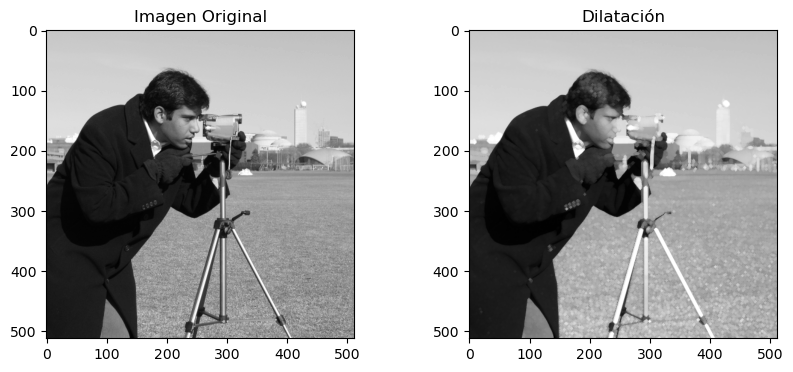

In [26]:
#Crear máscara de disco radio 2
selem = morph.disk(2)

#Leer imagen de entrada en el repositorio de skimage.data y aplicar una dilatación
img = skimage.data.camera()
dilate = morph.dilation(img, selem)

#Crear subplot 1x2 que muestre imagen de entrada y dilatada
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 4))
ax1.set_title('Imagen Original')
ax1.imshow(img, cmap='gray')
ax2.set_title('Dilatación')
ax2.imshow(dilate, cmap='gray');

## 3.2 Erosión
En niveles de gris la erosión se define como:

$$(f \ominus b)=min\left\{ f(x-i,y-j)-b(i,j) \right\}$$

La imagen resultante tiende a ser más oscura que la original ya que los elementos claros o brillantes son reducidos dependiendo de su valor, los valores de los valores colindantes y del elemento estructural.

<center><i>Figura. Erosión en escala de gris.</i>

<img src="res/M6/erosion_gris.png" alt="" style="width:700px"></center>

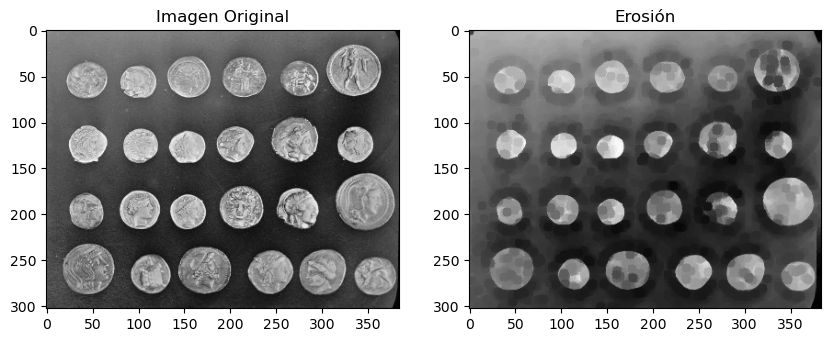

In [27]:
#Crear máscara con radio 5 y leer imagen de entrada
selem = morph.disk(5)
img = skimage.data.coins()

#Aplicar una erosión sobre la imagen de entrada
erode = morph.erosion(img, selem)

#Crear un subplot 1x2 para mostrar imagen original y erosionada
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 20))
ax1.set_title('Imagen Original')
ax1.imshow(img, cmap='gray')
ax2.set_title('Erosión')
ax2.imshow(erode, cmap='gray');

## 3.3. Apertura y Cierre
Debido a que las expresiones de apertura y cierre tienen como base la dilatación y erosión, las definiciones quedan iguales pero con las nuevas operaciones en escala de gris:
- Apertura: $$f \circ b = (f \ominus b)\oplus b$$
- Cierre: $$f \cdot b = (f \oplus b)\ominus b$$

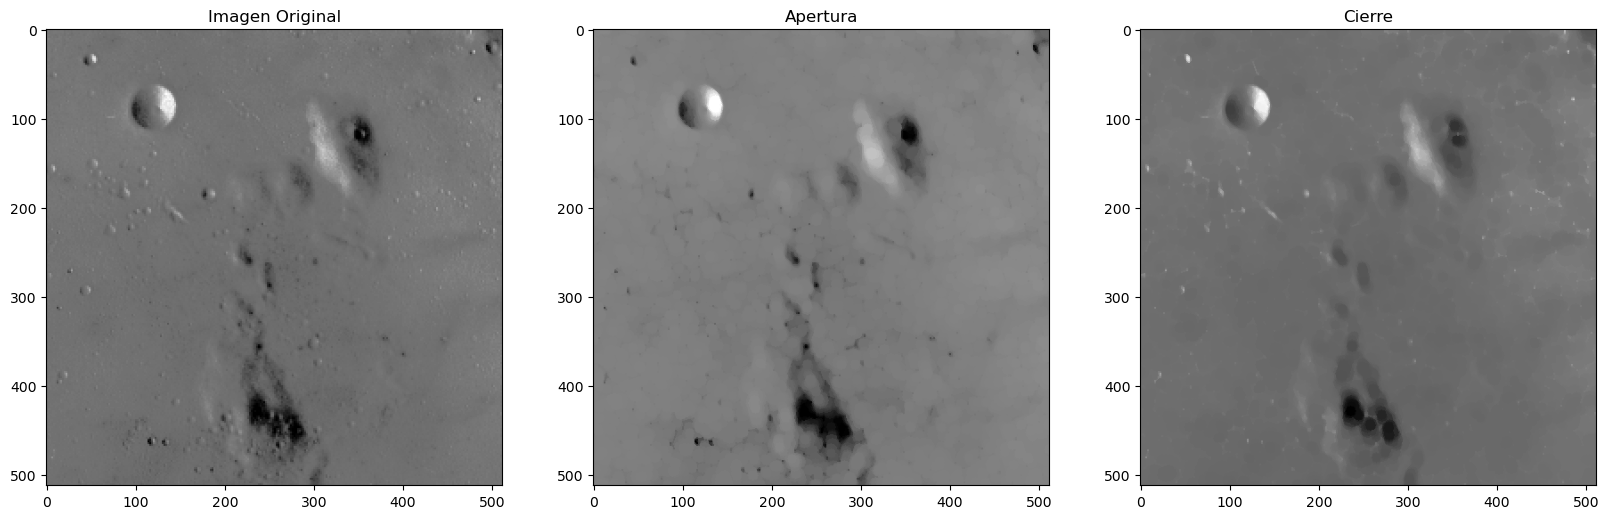

In [28]:
#Crear la máscara y leer imagen de entrada
img = skimage.data.moon()
selem = morph.disk(5)

#Aplicar apertura y cierre sobre la imagen original
apertura = morph.opening(img, selem)
cierre = morph.closing(img, selem)

#Crear subplot 1x3 y mostrar imagen original, bajo apertura y cierrre
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(20, 7))
ax1.set_title('Imagen Original')
ax1.imshow(img, cmap='gray')
ax2.set_title('Apertura')
ax2.imshow(apertura, cmap='gray')
ax3.set_title('Cierre')
ax3.imshow(cierre, cmap='gray');

- La apertura se usa para borrar detalles claros que sean pequeños en comparación con el elemento estructural, manteniendo el resto de la imagen prácticamente igual (la erosión también eliminaba pequeños detalles claros pero oscurecía toda la imagen).

- El cierre elimina detalles oscuros de la imagen, dejando el resto prácticamente igual (la dilatación también eliminaba detalles oscuros, pero aclaraba la imagen en general).

<br>
<center><i>Figura. Operaciones.</i>

<img src="res/grisesh.png" alt="" style="width:700px"></center>

## 3.4 Transformación Top-Hat
La Transformación Top-Hat es una operación que combina la apertura con la resta para resaltar los objetos de color contrario al fondo. Esta puede ser:

- White: Resalta objetos brillantes sobre fondo oscuro.
$$TH_W(A)=A - (A \circ B)$$

- Black: Resalta objetos oscuros sobre fondo brillante.
$$TH_B(A)=(A\circ B)-A$$

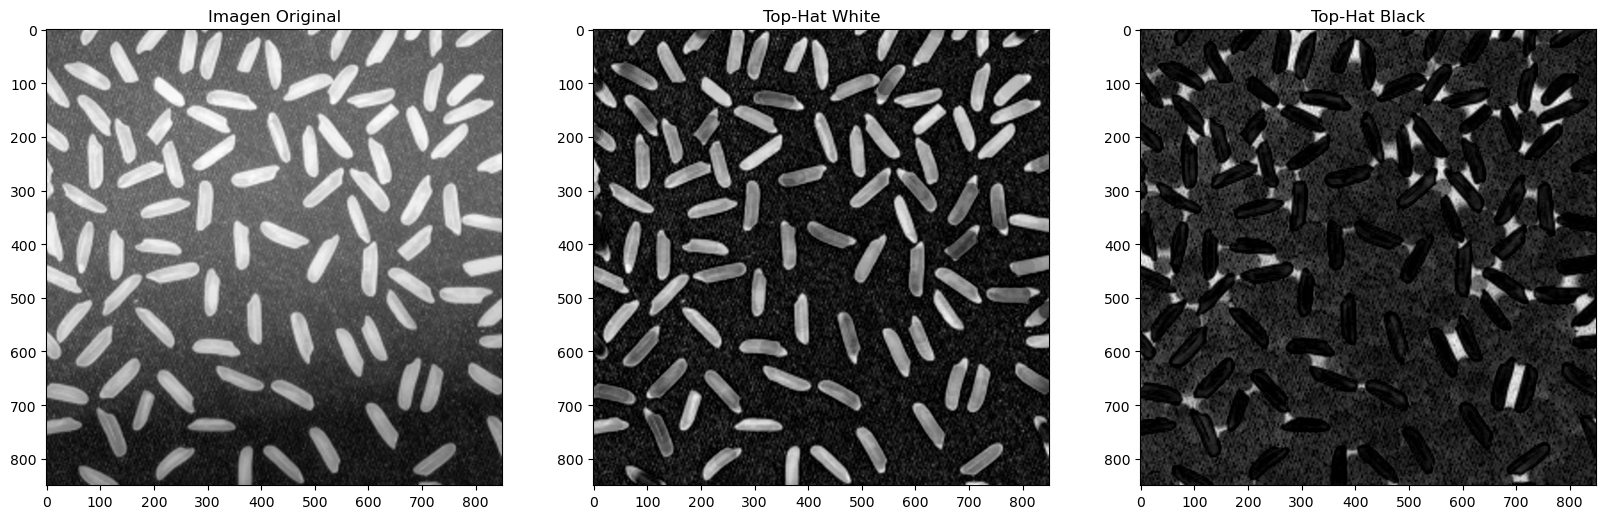

In [29]:
#Crear la máscara de disco radio 11 y leer imagen de entrada
selem = morph.disk(15)
img = skimage.io.imread('./res/M6/rice.jpg', as_gray=True)

#Aplicar la transformación top-hat black y top-hat white sobre la imagen, bajo la máscara de disco de radio 15
thw = morph.white_tophat(img, selem)
thb = morph.black_tophat(img, selem)

#Crear subplot 1x3 que muestra imagen original, top-hat white y top-hat black
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(20, 7))
ax1.set_title('Imagen Original')
ax1.imshow(img, cmap='gray')
ax2.set_title('Top-Hat White')
ax2.imshow(thw, cmap='gray')
ax3.set_title('Top-Hat Black')
ax3.imshow(thb, cmap='gray');

<center><i>Figura. Transformación Tophat.</i>

<img src="res/tophat.png" alt="" style="width:700px"></center>